# UMAP vector space

In [1]:
# load FAISS vector data from a file 
# do a UMAP data reduction and plot the result

import numpy as np
import matplotlib.pyplot as plt

# load the data
context = 'wiki_elephants'


In [2]:
from langchain_community.vectorstores import FAISS
from langchain_community.embeddings import OllamaEmbeddings


embeddings = OllamaEmbeddings(
    base_url="http://pcloud:11434", model="nomic-embed-text"
)
# path to index
path = f"contexts/{context}"
vector_db = FAISS.load_local(
    path, embeddings, allow_dangerous_deserialization=True
)


In [3]:
doc_store = vector_db.docstore

In [4]:
index = vector_db.index
print(index.is_trained)

True


In [ ]:
# number of documents
#print(index.ntotal)
# embedding dimension
print(index.d)

In [17]:
keys = list(doc_store._dict.keys())

# len(keys)
k = keys[0] 

In [20]:
data = doc_store.search(k)

In [28]:
data.page_content
data.metadata
data.metadata['source']
data.metadata['page']


0

In [41]:
print(data.page_content)

▪ Carrington, Richard (1958). Elephants: A Short Account of their Natural History,
Evolution and Inﬂuence on Mankind. Chatto & Windus. OCLC 911782153  (https://www.worldcat.org/oclc/911782153 ).
▪ Nance, Susan (2013). Entertaining Elephants: Animal Agency and the Business
of the American Circus. Baltimore, MD: Johns Hopkins University Press.
▪ Saxe, John Godfrey (1872). "The Blindmen and the Elephant" at Wikisource. The
Poems of John Godfrey Saxe.
▪ Williams, Heathcote (1989). Sacred Elephant. New York: Harmony Books.ISBN978-0-517-57320-4.
▪ International Elephant Foundation  (https://elephantconservation.org )
Retrieved from "https://en.wikipedia.org/w/index.php?title=Elephant&oldid=1224572233"
▪ External linksElephant - Wikipedia https://en.wikipedia.org/wiki/Elephant
39 of 39 5/19/24, 14:55


In [39]:
print('hugo\nkoopmans')

hugo
koopmans


In [44]:
# create a new dataframe
hover_data = pd.DataFrame()

# for all k in keys
# add document metadata to dataframe
for k in keys:
    data = doc_store.search(k)
    hover_data = hover_data._append(
        {
            "page": data.metadata['page'],
            "source": data.metadata['source'],
            "content": data.page_content[0:25]+" ...",
        },
        ignore_index=True,
    )

# hover_data.head()
hover_data.head()




,page,source,content
0,0,./data/Elephant-Wikipedia.pdf,Elephants\nTemporal range: ...
1,0,./data/Elephant-Wikipedia.pdf,and tough but sensitiv ...
2,0,./data/Elephant-Wikipedia.pdf,on their environments. El ...
3,0,./data/Elephant-Wikipedia.pdf,well as reproductive succ ...
4,1,./data/Elephant-Wikipedia.pdf,Distribution of living el ...


In [5]:
# facebooks lib directly
import faiss
# Number of docs added to your index
num_docs = index.ntotal
# Get the dimension of your embeddings
embedding_dimension = index.d

embeddings = faiss.rev_swig_ptr(index.get_xb(), num_docs*embedding_dimension).reshape(num_docs, embedding_dimension)


In [6]:
embeddings.shape

(172, 768)

In [ ]:
%pip install umap-learn

In [7]:
# plot with umap
#import sklearn.datasets
import pandas as pd
import numpy as np
import umap.umap_ as umap


/data/git/local-llama3-rag-app/.local_llamma3/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


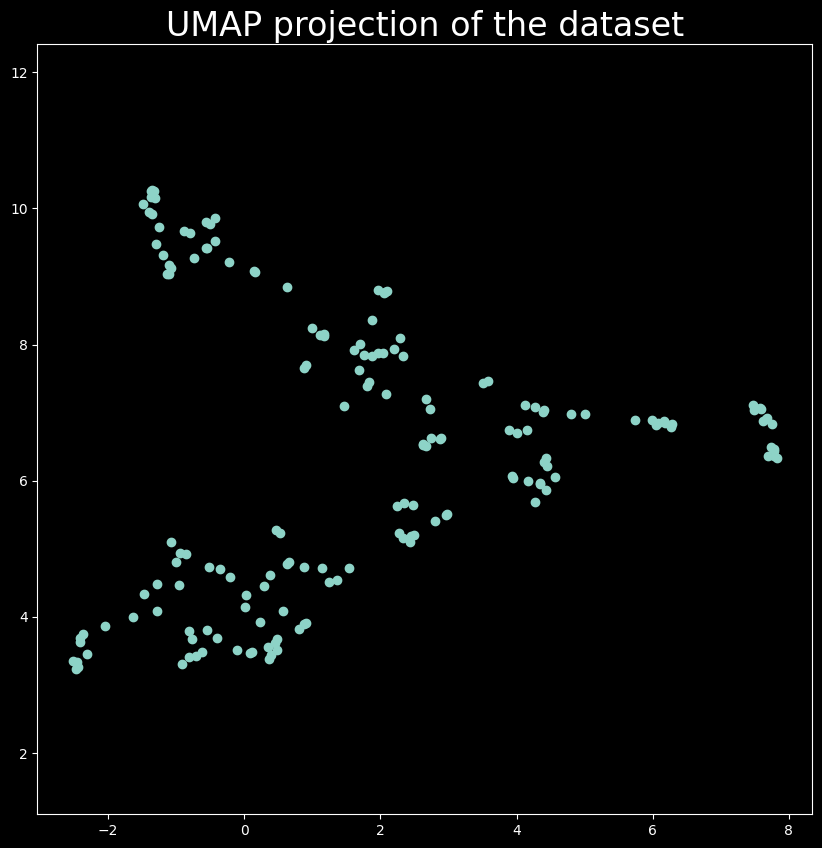

In [14]:
# we should investigate different settings for the UMAP algorithm
# to get a better representation of the data
reducer = umap.UMAP(n_neighbors=5, min_dist=0.01, metric='cosine')
umap_embedding = reducer.fit_transform(embeddings)

# plot the result
plt.figure(figsize=(10,10))
plt.scatter(umap_embedding[:, 0], umap_embedding[:, 1])
plt.gca().set_aspect('equal', 'datalim')

plt.title('UMAP projection of the dataset', fontsize=24)

plt.show()

In [ ]:
%pip install umap-learn[plot]

In [11]:
import umap.plot

umap.plot.output_notebook()


/data/git/local-llama3-rag-app/.local_llamma3/lib/python3.12/site-packages/dask/dataframe/__init__.py:31: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


Loading BokehJS ...

In [15]:
# we should investigate different settings for the UMAP algorithm
# to get a better representation of the data
reducer = umap.UMAP(n_neighbors=5, min_dist=0.01, metric='cosine')
umap_embedding_obj = reducer.fit(embeddings)

In [45]:

p = umap.plot.interactive(umap_embedding_obj,hover_data=hover_data)

umap.plot.show(p)